In [2]:
from astropy.io import fits
from astropy.table import Table

from astropy.coordinates import SkyCoord
import astropy.units as u

import numpy as np

import matplotlib.pyplot as plt

In [126]:
ms = fits.open('07292020/red/CDAFB_WDcc1847p1811.0020r.0001.fits')

In [127]:
#wl1 = t1[0].header['CRVAL1'] + t1[0].header['CD1_1'] * np.arange(t1[0].data.shape[2])
#fl1 = t1[0].data[i,0,:]

ms_wl = ms[0].header['CRVAL1'] + ms[0].header['CD1_1'] * np.arange(ms[0].data.shape[2])
ms_fl = ms[0].data[0,0,:]

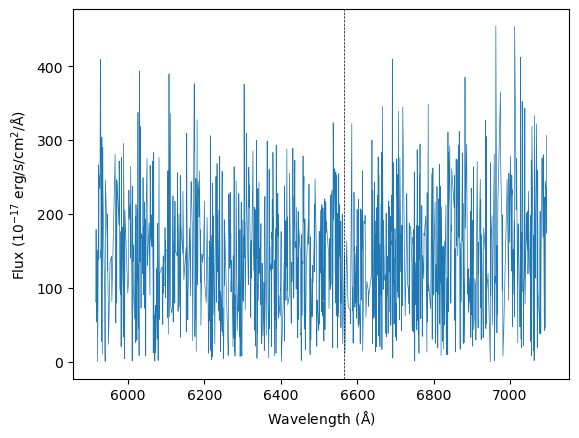

In [128]:
#to_plot1 = (fl1 > 1e-18)
ms_toplot = (ms_fl > 1e-18)
ms_toplot[1:] = ms_toplot[1:] * ms_toplot[0:-1]
ms_toplot[0:-1] = ms_toplot[0:-1] * ms_toplot[1:]
    
#plt.plot(wl1[to_plot1], fl1[to_plot1], alpha = 0.7, lw=0.5)
plt.plot(ms_wl[ms_toplot], ms_fl[ms_toplot] * 1e17, lw = 0.5)

plt.xlabel(r'Wavelength ($\rm \AA$)')
plt.ylabel(r'Flux ($10^{-17}$ erg/s/cm$^2$/$\rm \AA$)')

plt.axvline(x=6564.61, ls='--', c='k', lw=0.5)

#plt.ylim(0,100)

#plt.xlim(4000, 6600)

In [65]:
reference = Table.read('../../data/catalog_final.fits')

ra = ms[0].header['RA']
dec = ms[0].header['DEC']
coord = SkyCoord(ra, dec, unit = (u.hourangle, u.deg))
print(coord)

reference['sep'] = reference['wd_coords'].separation(coord)
if min(reference['sep']) < 1:
    print(min(reference['sep']))
else:
    print('Nothing within 1 degree!')

<SkyCoord (ICRS): (ra, dec) in deg
    (51.29441667, -1.18743889)>
Nothing within 1 degree!
